In [1]:
import chardet
import jieba
import numpy as np
from PIL import Image
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show, rc


## English白色背景的方形词云图

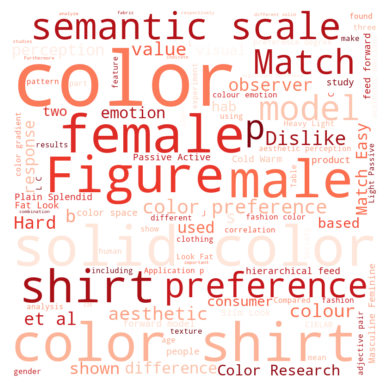

In [2]:
# 获取当前文件路径
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# 获取文本text
text = open(path.join(d, 'WordCloud.txt')).read()
# 生成词云
#wc = WordCloud(scale=2,max_font_size = 100)
wc = WordCloud(font_path=None,  # 字体路径，英文不用设置路径，中文需要，否则无法正确显示图形
               width=400,  # 默认宽度
               height=400,  # 默认高度
               margin=2,  # 边缘
               ranks_only=None,
               prefer_horizontal=0.9,
               mask=None,  # 背景图形，如果想根据图片绘制，则需要设置
               scale=2,
               color_func=None,
               max_words=100,  # 最多显示的词汇量
               min_font_size=4,  # 最小字号
               stopwords=None,  # 停止词设置，修正词云图时需要设置
               random_state=None,
               background_color='white',  # 背景颜色设置，可以为具体颜色,比如white或者16进制数值
               max_font_size=None,  # 最大字号
               font_step=1,
               mode='RGB',
               relative_scaling='auto',
               regexp=None,
               collocations=True,
               colormap='Reds',  # matplotlib 色图，可更改名称进而更改整体风格
               normalize_plurals=True,
               contour_width=0,
               contour_color='black',
               repeat=False)

wc.generate_from_text(text)
# 显示图像

fig = figure(figsize=(4, 4), dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
# fig.savefig("词云图1.pdf")
plt.show()


## 中文黑色背景的圆形词云图

Building prefix dict from the default dictionary ...
{'encoding': 'GB2312', 'confidence': 0.99, 'language': 'Chinese'}
[('b', 131), ('c', 106), ('x y', 103), ('y', 80), ('x', 75), ('aes x', 56), ('函数', 45), ('label', 45), ('图4', 45), ('d', 40), ('size', 39), ('所示', 39), ('df', 37), ('colour black', 37), ('np', 36), ('图', 36), ('N', 36), ('alpha', 35), ('图3', 35), ('其中', 34), ('mydata', 31), ('color black', 31), ('plot', 29), ('图1', 28), ('f', 28), ('如图3', 28), ('df aes', 28), ('variable', 27), ('mydata aes', 27), ('library ggplot2', 27), ('plt', 26), ('brewer pal', 26), ('FALSE', 25), ('z', 25), ('TRUE', 25), ('color', 25), ('y z', 24), ('ggplot data', 24), ('axis', 23), ('e', 23), ('b c', 22), ('values c', 22), ('width', 21), ('ggplot df', 20), ('size colour', 20), ('如图', 19), ('read csv', 19), ('data frame', 19), ('index', 18), ('dc', 18)]
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.012 seconds.
Prefix dict has been built successfull

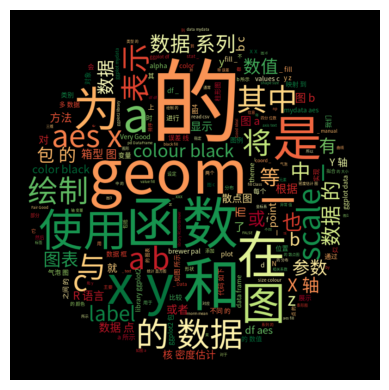

In [3]:
text = open(path.join(d, 'WordCloud_Chinese.txt'), 'rb').read()
text_charInfo = chardet.detect(text)
print(text_charInfo)
# 结果
#{'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
text = open(path.join(d, r'WordCloud_Chinese.txt'),
            encoding='GB2312', errors='ignore').read()


# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc, text)
sort = sorted(process_word.items(), key=lambda e: e[1], reverse=True)
print(sort[:50])  # 获取文本词频最高的前50个词

text += ' '.join(jieba.cut(text, cut_all=False))  # cut_all=False 表示采用精确模式
# 设置中文字体
font_path = 'SourceHanSansCN-Regular.otf'  # 思源黑体
# 读取背景图片
background_Image = np.array(Image.open(path.join(d, "WordCloud_Image.jpg")))
# 提取背景图片颜色
img_colors = ImageColorGenerator(background_Image)
# 设置中文停止词
stopwords = set('')
stopwords.update(['但是', '一个', '自己', '因此', '没有', '很多', '可以', '这个', '虽然', '因为', '这样', '已经', '现在',
                  '一些', '比如', '不是', '当然', '可能', '如果', '就是', '同时', '比如', '这些', '必须', '由于', '而且', '并且', '他们'])

wc = WordCloud(
    font_path=font_path,  # 中文需设置路径
    # width=400, # 默认宽度
    # height=400, # 默认高度
    margin=2,  # 页面边缘
    mask=background_Image,
    scale=2,
    max_words=200,  # 最多词个数
    min_font_size=4,
    stopwords=stopwords,
    random_state=42,
    background_color='black',  # 背景颜色
    # background_color = '#C3481A', # 背景颜色
    colormap='RdYlGn_r',  # matplotlib 色图，可更改名称进而更改整体风格
    max_font_size=100,
)
wc.generate(text)
# 获取文本词排序，可调整 stopwords
process_word = WordCloud.process_text(wc, text)
sort = sorted(process_word.items(), key=lambda e: e[1], reverse=True)
print(sort[:50])  # 获取文本词频最高的前50个词
# 设置为背景色，若不想要背景图片颜色，就注释掉
# wc.recolor(color_func=img_colors)
# 存储图像
# wc.to_file('浪潮之巅basic.png')
# 显示图像
fig = figure(figsize=(4, 4), dpi=100)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# fig.savefig("词云图2.pdf")

plt.show()
